<a href="https://colab.research.google.com/github/X-ray-Dawgz/XRayDawgz/blob/master/With_new_testset_Updated_CS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone -b master https://github.com/X-ray-Dawgz/XRayDawgz.git

Cloning into 'XRayDawgz'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 3735 (delta 20), reused 13 (delta 4), pack-reused 3684
Receiving objects: 100% (3735/3735), 51.89 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (294/294), done.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
# image size
img_width, img_height = 379,288
# train and test sample sizes
train_samples = 665
test_samples = 98
# set weights
epochs = 125
batch_size = 20
# Directories of train and test data
train_dir = 'XRayDawgz/cut_image/Train'
test_dir = 'XRayDawgz/cut_image/Test'

# data image augmentation to create more variation of XRD patterns
train_data = ImageDataGenerator(rescale=1. / 255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# only resize for test data
test_data = ImageDataGenerator(rescale=1. / 255)

# import train data consisting of 'binary' or  2 classifications (BCC or FCC) 
train_gen = train_data.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='binary',)

# import test data consisting of 'binary' or  2 classifications (BCC or FCC) 
test_gen = test_data.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 1330 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [0]:
# build CNN model
model = Sequential()
# extract features by iterating across image
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(96, (3, 3), activation='relu', padding='valid',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# model.summary()

# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [1]:
# train model
cs_classification = model.fit_generator(train_gen,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=test_samples // batch_size)

NameError: ignored

loss: 0.26
Validation loss: 0.16
Accuracy: 0.89
Validation Accuracy: 0.95
Mean Loss: 0.45
Mean Validation Loss: 0.54
Mean Accuracy: 0.80
Mean Validation Accuracy: 0.78


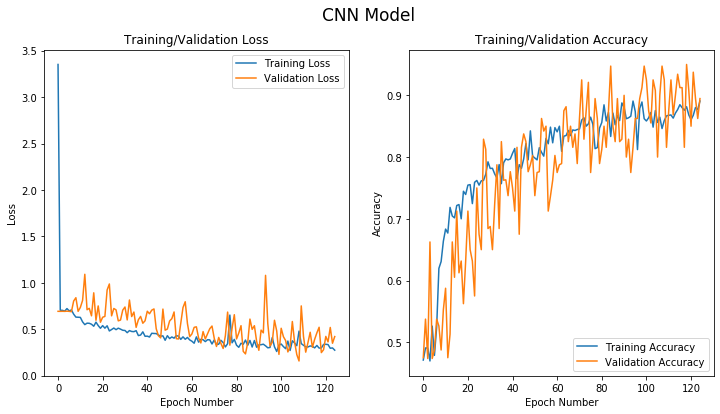

In [0]:
# plot model data
x = np.arange(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.2)
fig.suptitle("CNN Model", y=.98, fontsize=17)
ax[0].set_xlabel("Epoch Number")
ax[1].set_xlabel("Epoch Number")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Accuracy")
ax[0].plot(x, cs_classification.history["loss"], label="Training Loss")
ax[0].plot(x, cs_classification.history["val_loss"], label="Validation Loss")
ax[1].plot(x, cs_classification.history["acc"], label="Training Accuracy")
ax[1].plot(x, cs_classification.history["val_acc"], label="Validation Accuracy")
ax[0].set_title('Training/Validation Loss')
ax[1].set_title('Training/Validation Accuracy')
ax[0].legend(loc="upper right")
ax[1].legend(loc="lower right")
print('loss: %.2f' %(np.amin(cs_classification.history["loss"])))
print('Validation loss: %.2f' %(np.amin(cs_classification.history["val_loss"])))
print('Accuracy: %.2f' %(np.amax(cs_classification.history["acc"])))
print('Validation Accuracy: %.2f' %(np.amax(cs_classification.history["val_acc"])))
print('Mean Loss: %.2f' %(np.mean(cs_classification.history["loss"])))
print('Mean Validation Loss: %.2f' %(np.mean(cs_classification.history["val_loss"])))
print('Mean Accuracy: %.2f' %(np.mean(cs_classification.history["acc"])))
print('Mean Validation Accuracy: %.2f' %(np.mean(cs_classification.history["val_acc"])))

In [0]:
# run model iterating to predict FCC or BCC test images
BCC_test_dir = 'XRayDawgz/Images/Test/BCC_test/'
FCC_test_dir = 'XRayDawgz/Images/Test/FCC_test/'

BCC_Prediction = np.zeros(test_samples)
FCC_Prediction = np.zeros(test_samples)
i=0
correct_count=0
for file in os.listdir(BCC_test_dir):
  predict_img = image.load_img(BCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 0:
    correct_count += 1
  else:
    pass
print('BCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

i=0
correct_count=0
for file in os.listdir(FCC_test_dir):
  predict_img = image.load_img(FCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 1:
    correct_count += 1
  else:
    pass
print('FCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

BCC prediction accuracy: 64.29%
FCC prediction accuracy: 95.92%
